In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#목표
- 직원의 이직여부를 예측하는 선형분류모델 설계

#문제정의
- BX : 최근 이직 시장이 활발하게 성장함에 따라 직원들도 줄줄이 퇴사 행렬을 이어가고 있다. 경영진은 핵심인재 유출을 최대한 줄이고, 오랜시간 함께 성장할 수 있는 회사를 만들고 싶다.
- CX : 자신의 성장을 느낄 수 있는 회사, 성과에 따른 적절한 보상과 효율적인 업무를 진행할 수 있는 회사를 원한다.
- DX : 데이터분석을 통해 이직률과 연관이 있는 사항들을 지속적으로 확인하고 개선, HR팀은 이직 가능성이 높은 핵심 인재를 예측하고 해당 인원을 위한 관리 프로그램을 운영

In [2]:
data = pd.read_csv("data/job_transfer.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

| 컬럼명                      | 설명                                                                          |
| ------------------------ | --------------------------------------------------------------------------- |
| Age                      | 직원의 나이                                                                      |
| Attrition                | 직원의 이직 여부 (Yes / No)                                                        |
| BusinessTravel           | 직원의 출장 빈도 (Non-Travel, Travel_Rarely, Travel_Frequently)                    |
| DailyRate                | 직원의 일일 급여                                                                   |
| Department               | 직원이 속한 부서 (Research & Development, Sales, Human Resources)                  |
| DistanceFromHome         | 직원의 집으로부터 회사까지의 거리                                                          |
| Education                | 직원의 학력 수준 (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor) |
| EducationField           | 직원의 전공 분야                                                                   |
| EmployeeCount            | 직원 수 (모든 값이 1로 동일)                                                          |
| EmployeeNumber           | 직원의 고유 번호                                                                   |
| EnvironmentSatisfaction  | 직원의 업무 환경 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                    |
| Gender                   | 직원의 성별 (Male, Female)                                                       |
| HourlyRate               | 직원의 시간당 급여                                                                  |
| JobInvolvement           | 직원의 직무 참여도 (1: Low, 2: Medium, 3: High, 4: Very High)                       |
| JobLevel                 | 직원의 직급                                                                      |
| JobRole                  | 직원의 직무                                                                      |
| JobSatisfaction          | 직원의 직무 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                       |
| MaritalStatus            | 직원의 결혼 여부 (Single, Married, Divorced)                                       |
| MonthlyIncome            | 직원의 월급                                                                      |
| MonthlyRate              | 직원의 월별 급여 총액                                                                |
| NumCompaniesWorked       | 직원이 근무한 회사 수                                                                |
| Over18                   | 직원이 18세 이상인지 여부 (모든 값이 Y로 동일)                                               |
| OverTime                 | 직원의 초과 근무 여부 (Yes / No)                                                     |
| PercentSalaryHike        | 직원의 급여 인상 비율                                                                |
| PerformanceRating        | 직원의 성과 평가 등급 (1: Low, 2: Good, 3: Excellent, 4: Outstanding)                |
| RelationshipSatisfaction | 직원의 동료와의 관계 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                  |
| StandardHours            | 직원의 표준 근무 시간 (모든 값이 80으로 동일)                                                |
| StockOptionLevel         | 직원의 주식 옵션 수준 (0, 1, 2, 3)                                                   |
| TotalWorkingYears        | 직원의 총 근무 연수                                                                 |
| TrainingTimesLastYear    | 지난해 직원이 받은 교육 횟수                                                            |
| WorkLifeBalance          | 직원의 일-생활 균형 만족도 (1: Bad, 2: Good, 3: Better, 4: Best)                       |
| YearsAtCompany           | 직원이 현재 회사에서 근무한 기간                                                          |
| YearsInCurrentRole       | 직원이 현재 역할에서 근무한 기간                                                          |
| YearsSinceLastPromotion  | 직원의 마지막 승진 이후 경과된 기간                                                        |
| YearsWithCurrManager     | 직원이 현재 관리자와 함께 일한 기간                                                        |


In [4]:
#전처리는 결측치 없어서 필요가 없음
#이직률 확인
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
#로지스틱 회귀 모델로 분류하기 때문에 0,1로 바꿔줘야 함
data['Attrition'][data['Attrition'] == 'Yes'] = 1
#data['Attrition'] = np.where(data['Attrition'] == 'Yes', 1, 0)
#np.where(조건식, True일 때 값, False일 때 값)

/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_13227/1633658540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'][data['Attrition'] == 'Yes'] = 1


In [6]:
data['Attrition'][data['Attrition'] == 'No'] = 0

/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_13227/1387673161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'][data['Attrition'] == 'No'] = 0


In [7]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [8]:
#이직률
237/(1233+237) #16프로 정도?

0.16122448979591836

In [9]:
#나이를 연속적 숫자형태로 되어있음 -> 구간을 나눠서 그룹화
#30세 이하, 31~40세, 40세 초과
data['Age_group'] = np.where(data['Age'] <= 30, '30세 이하', np.where(data['Age'] <= 40, '31~40세', '40세 초과'))

In [10]:
data[['Age','Age_group']]

,Age,Age_group
0,41,40세 초과
1,49,40세 초과
2,37,31~40세
3,33,31~40세
4,27,30세 이하
...,...,...
1465,36,31~40세
1466,39,31~40세
1467,27,30세 이하
1468,49,40세 초과


In [11]:
#연령대별 이직률
#데이터(sum) / 전체 (count)

df_gp = data[['Age_group', 'Attrition']].groupby(['Age_group']).sum()
df_gp['total'] = data[['Age_group', 'Attrition']].groupby(['Age_group']).count()

df_gp = data.groupby('Age_group')['Attrition'].agg(['count','sum'])

In [12]:
df_gp = data.groupby('Age_group')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = (df_gp['sum'] / df_gp['count'])*100

In [13]:
df_gp

,count,sum,ratio
Age_group,,,
30세 이하,386,100,25.906736
31~40세,619,85,13.731826
40세 초과,465,52,11.182796


In [14]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [15]:
gender_gp = data.groupby('Gender')['Attrition'].agg(['count', 'sum'])
gender_gp['ratio'] = (gender_gp['sum']/gender_gp['count'])*100

In [16]:
gender_gp

,count,sum,ratio
Gender,,,
Female,588,87,14.795918
Male,882,150,17.006803


In [17]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [18]:
department_gp = data.groupby('Department')['Attrition'].agg(['count', 'sum'])
department_gp['ratio'] = (department_gp['sum']/department_gp['count'])*100

In [19]:
department_gp

,count,sum,ratio
Department,,,
Human Resources,63,12,19.047619
Research & Development,961,133,13.83975
Sales,446,92,20.627803


In [20]:
#가설 1. 업무만족도가 높더라도, 인간관계로 인한 이직률은 높을 것이다

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_group'],
      dtype='object')

In [22]:
#인간관계만족도, 업무만족도, 이직간의 관계 확인
#JobSatisfaction 업무만족도
#RelationshipSatisfaction 인간관계 만족도
data[['JobSatisfaction','RelationshipSatisfaction','Attrition']]

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0
...,...,...,...
1465,4,3,0
1466,1,1,0
1467,2,2,0
1468,2,4,0


In [23]:
df_gp = data.groupby('JobSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = df_gp['sum']/df_gp['count']*100
df_gp
#업무만족도가 낮을수록 이직률이 높다

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.83737
2,280,46,16.428571
3,442,73,16.515837
4,459,52,11.328976


In [24]:
df_gp = data.groupby('RelationshipSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = df_gp['sum']/df_gp['count']*100
df_gp
#업무만족도가 낮을수록 이직률이 높다

,count,sum,ratio
RelationshipSatisfaction,,,
1,276,57,20.652174
2,303,45,14.851485
3,459,71,15.46841
4,432,64,14.814815


In [25]:
df_gp = (
    data
    .groupby(['RelationshipSatisfaction', 'JobSatisfaction'])['Attrition']
    .agg(['count', 'sum'])
)

df_gp['ratio'] = df_gp['sum'] / df_gp['count'] * 100
df_gp
#업무만족도가 낮은 직원은 인간관계만족도가 낮을수록 이직률이 증가
#어부만족도가 높은 직원은 인간관계만족도 영향을 덜 받음.

count sum      ratio
RelationshipSatisfaction JobSatisfaction                      
1                        1                   54  16   29.62963
                         2                   53  15  28.301887
                         3                   85  16  18.823529
                         4                   84  10  11.904762
2                        1                   57  15  26.315789
                         2                   57   8  14.035088
                         3                   94  11  11.702128
                         4                   95  11  11.578947
3                        1                   91  22  24.175824
                         2                   81  13  16.049383
                         3                  133  19  14.285714
                         4                  154  17  11.038961
4                        1                   87  13  14.942529
                         2                   89  10  11.235955
                         3                  130  27  20.769231
                         4                  126  14  11.111111

In [26]:
#이건 내 방식
df_gpp = data[['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction', 'RelationshipSatisfaction']).sum()
df_gpp['count'] = data[['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction', 'RelationshipSatisfaction']).count()
df_gpp['ratio'] = df_gpp['Attrition'] / df_gpp['count'] * 100

In [27]:
df_gpp

Attrition  count      ratio
JobSatisfaction RelationshipSatisfaction                            
1               1                               16     54   29.62963
                2                               15     57  26.315789
                3                               22     91  24.175824
                4                               13     87  14.942529
2               1                               15     53  28.301887
                2                                8     57  14.035088
                3                               13     81  16.049383
                4                               10     89  11.235955
3               1                               16     85  18.823529
                2                               11     94  11.702128
                3                               19    133  14.285714
                4                               27    130  20.769231
4               1                               10     84  11.904762
                2                               11     95  11.578947
                3                               17    154  11.038961
                4                               14    126  11.111111

###가설 1 결론. 업무만족도가 높으나 인간관계로 인한 이직률이 높을 것이다.
=> 가설 기각
=> 업무만족도가 높을수록 인간관계로 인한 영향이 적다.
=> 업무만족도가 낮을수록 인간관계에 영향이 높다. 

In [28]:
###가설 2. 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을 것이다
#근속년수 : YearsAtCompany
#직원이 현재 역할에서 근무한 기간 : YearsInCurrentRole

In [29]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_group'],
      dtype='object')

In [30]:
#근속년수 대비 한가지 업무에서 진행 비율
data['RoleCompany'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['RoleCompany']

0       0.666667
1       0.700000
2            NaN
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: RoleCompany, Length: 1470, dtype: float64

In [31]:
#결측치 0으로 채워주기
data['RoleCompany'].fillna(0, inplace=True)
data['RoleCompany']

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: RoleCompany, Length: 1470, dtype: float64

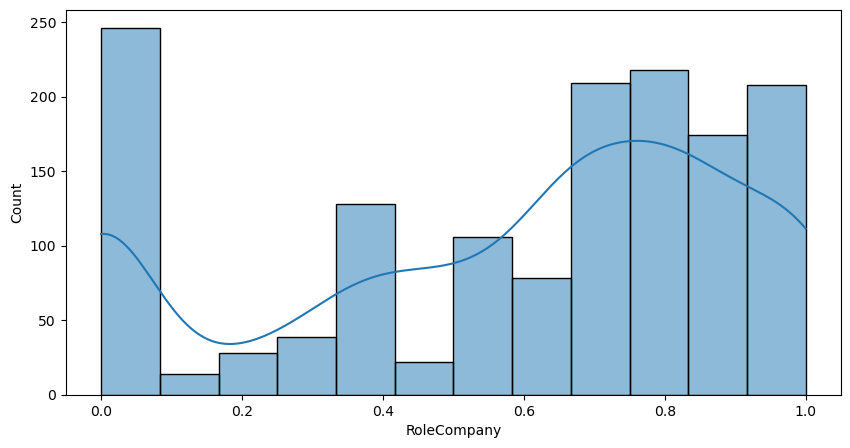

In [32]:
# rolecompany 분포 확인
# distplot -> 데이터의 분포를 시각화하는데 사용
# 히스토그램과 커널밀도추정을 함께 그려 데이터의 분포 파악 용이

plt.figure(figsize=(10,5))
sns.histplot(data['RoleCompany'], kde=True) #kde는 kernel density estimation으로 확률밀도 함수
plt.show()

In [33]:
# RoleCompany 구간화 작업 후 구간별 이직률
# 0.3이하, 0.3 초과, 0.6이하, 0.6초과
data['RoleCompany_gp'] = np.where(data['RoleCompany'] <= 0.3, '0.3 이하', np.where(data['RoleCompany'] <= 0.6, '0.3초과 0.6 이하', '0.6 초과'))




In [34]:
data['RoleCompany_gp'].value_counts()

RoleCompany_gp
0.6 초과          826
0.3 이하          323
0.3초과 0.6 이하    321
Name: count, dtype: int64

In [35]:
df_gp = (
    data
    .groupby('RoleCompany_gp')['Attrition']
    .agg(['count', 'sum'])
)

df_gp['ratio'] = df_gp['sum'] / df_gp['count'] * 100
df_gp
#업무만족도가 낮은 직원은 인간관계만족도가 낮을수록 이직률이 증가
#어부만족도가 높은 직원은 인간관계만족도 영향을 덜 받음.

,count,sum,ratio
RoleCompany_gp,,,
0.3 이하,323,89,27.55418
0.3초과 0.6 이하,321,38,11.838006
0.6 초과,826,110,13.317191


In [36]:
#가설 2 결론
# 근속년수 대비 한 업무에 오래 근무할수록 이직률이 낮다
# => 가설2 기각

가설 3 야근을 많이해도 급여인상률이 높다면 이직률이 낮을 것이다.

In [37]:
#야근 여부 (OverTime)에 따른 이직률
df_gp = (
    data
    .groupby('OverTime')['Attrition']
    .agg(['count', 'sum'])
)

df_gp['ratio'] = df_gp['sum'] / df_gp['count'] * 100
df_gp

,count,sum,ratio
OverTime,,,
No,1054,110,10.436433
Yes,416,127,30.528846


In [38]:
#연봉인상률에 따른 이직률
df_gp = (
    data
    .groupby('PercentSalaryHike')['Attrition']
    .agg(['count', 'sum'])
)

df_gp['ratio'] = df_gp['sum'] / df_gp['count'] * 100
df_gp

,count,sum,ratio
PercentSalaryHike,,,
11,210,41,19.52381
12,198,33,16.666667
13,209,34,16.267943
14,201,24,11.940299
15,101,18,17.821782
16,78,14,17.948718
17,82,14,17.073171
18,89,13,14.606742
19,76,9,11.842105


In [39]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_group', 'RoleCompany', 'RoleCompany_gp'],
      dtype='object')

In [40]:
#(야근 여부와 연봉인상률)에 따른 이직률
df_gp = (
    data
    .groupby(['OverTime', 'PercentSalaryHike'])['Attrition']
    .agg(['count', 'sum'])
)

df_gp['ratio'] = df_gp['sum'] / df_gp['count'] * 100
df_gp
#야근을 많이하는 사람들은 높은 연봉인상에도 불구하고 이직률이 눈에 띄게 낮아지지는 않는다.

count sum      ratio
OverTime PercentSalaryHike                      
No       11                   149  19  12.751678
         12                   139  18   12.94964
         13                   144  14   9.722222
         14                   145   8   5.517241
         15                    80  12       15.0
         16                    55   8  14.545455
         17                    66   9  13.636364
         18                    60   5   8.333333
         19                    55   3   5.454545
         20                    40   4       10.0
         21                    36   2   5.555556
         22                    41   6  14.634146
         23                    19   1   5.263158
         24                    12   1   8.333333
         25                    13   0        0.0
Yes      11                    61  22  36.065574
         12                    59  15  25.423729
         13                    65  20  30.769231
         14                    56  16  28.571429
         15                    21   6  28.571429
         16                    23   6  26.086957
         17                    16   5      31.25
         18                    29   8  27.586207
         19                    21   6  28.571429
         20                    15   3       20.0
         21                    12   3       25.0
         22                    15   6       40.0
         23                     9   5  55.555556
         24                     9   5  55.555556
         25                     5   1       20.0

In [41]:
#위 요약 데이터에서 야근 no 직원의 평균 이직률
df_gp_plot = df_gp.reset_index()
df_gp_plot['ratio'][df_gp_plot['OverTime'] == 'No'].mean()

#위 요약 데이터에서 야근 yes 직원의 평균 이직률
df_gp_plot = df_gp.reset_index()
df_gp_plot['ratio'][df_gp_plot['OverTime'] == 'Yes'].mean()

31.933806239797967

5. 모델 선택 및 하이퍼파라미터 튜닝
- 문제데이터 확인 (인코딩 필요)
- x,y 데이터 분리
- train, test 데이터 분리
- 학습
- 평가

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [43]:
#가설검증을 위해 생성했던 컬럼 삭제
X = data.drop(['Attrition', 'Age_group', 'RoleCompany', 'RoleCompany_gp'], axis=1)
y = data['Attrition']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [45]:
X['BusinessTravel'].unique()
#레이블 인코딩 해줄것

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [46]:
#딕셔너리로 정의(우선순위를 주고 싶은 데이터에 큰 숫자를 연결)
BT_dict = {'Non-Travel' : 1,
          'Travel_Rarely' : 2,
          'Travel_Frequently' : 3}

#딕셔너리에 연결된 value값으로 바꿀 수 있도록 매핑
# map() : 값을 매핑, key값을 찾아서, 해당 value값으로 변경

X['BusinessTravel'] = X['BusinessTravel'].map(BT_dict)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [48]:
#나머지 컬럼들 원핫인코딩 진행
X_one_hot = pd.get_dummies(X, dtype=int)

In [49]:
X_one_hot

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,2,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,3,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,2,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,3,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,2,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,884,23,2,1,2061,3,41,4,...,0,0,0,0,0,1,0,1,1,0
1466,39,2,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,1,0,1,1,0
1467,27,2,155,4,3,1,2064,2,87,4,...,0,0,0,0,0,1,0,1,0,1
1468,49,3,1023,2,3,1,2065,4,63,2,...,0,0,1,0,0,1,0,1,1,0


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=23)

In [51]:
y_train = y_train.astype(int)

In [52]:
y_test = y_test.astype(int)

In [53]:
#객체 생성
lr_model = LogisticRegression()
#모델 학습
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#분류이기 때문에 r2 score아니고 정확도임
lr_model.score(X_train, y_train)

0.8483965014577259

In [55]:
lr_model.score(X_test, y_test)

0.8231292517006803

In [56]:
#객체 생성 #반복횟수 늘리기
lr_model = LogisticRegression(max_iter=5000)
#모델 학습
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [57]:
#분류이기 때문에 r2 score아니고 정확도임
lr_model.score(X_train, y_train)

0.8979591836734694

In [58]:
lr_model.score(X_test, y_test)

0.873015873015873

#교차검증(cross validation)
- 모델의 일반화 성능 측정
- 모델이 데이터에 대해 얼마나 잘 맞추는지 평가, 한번 평가하는 게 아닌 여러번에 걸쳐 평가하는 것이 신뢰도 높음
- 방법 : (훈련데이터 내에서)훈련세트와 테스트 세트로 나눠서 여러번 평가
- 모델의 정확도와 안정성 파악
- 평균적인 성능이 높다면 일반화된 모델이라 판단 가능
- 장점 : 과적합을 감소하는데 도움이 됨
    - 모델이 훈련데이터의 변경에 얼마나 민감한지 확인
    - 데이터셋이 적은 경우 유용하게 사용됨
- 단점 : 여러번 학습하고 평가 -> 계산량 많아짐 -> 시간, 비용 많이 듦

In [59]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_model, X_train, y_train, cv = 5)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.88349515, 0.88834951, 0.89320388, 0.88834951, 0.88780488])

- support vector machine
- 데이터를 나누는 직선(영역)을 그어서, 클래스 나눔

In [60]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(class_weight='balanced')

# 모델 학습
svm_model.fit(X_train, y_train)

#모델 교차검증
result = cross_val_score(svm_model, X_train, y_train, cv = 5)
result.mean()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

0.8415818138763912

In [61]:
svm_model.score(X_test, y_test)

0.8231292517006803

In [62]:
from sklearn.metrics import classification_report
pre = svm_model.predict(X_test)
print(classification_report(y_test, pre)) #실제값 먼저

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       363
           1       0.00      0.00      0.00        78

    accuracy                           0.82       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.68      0.82      0.74       441



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print(y_test)

809     0
744     1
811     0
568     1
1191    0
       ..
946     1
1015    0
1150    0
1377    0
1329    0
Name: Attrition, Length: 441, dtype: int64
